In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Epoch 1/20
250/250 [==============================] - 21s 24ms/step - loss: 0.0141 - val_loss: 0.0318
Epoch 2/20
250/250 [==============================] - 3s 13ms/step - loss: 0.0106 - val_loss: 0.0167
Epoch 3/20
250/250 [==============================] - 3s 13ms/step - loss: 0.0109 - val_loss: 0.0196
Epoch 4/20
250/250 [==============================] - 4s 17ms/step - loss: 0.0105 - val_loss: 0.0161
Epoch 5/20
250/250 [==============================] - 3s 13ms/step - loss: 0.0104 - val_loss: 0.0152
Epoch 6/20
250/250 [==============================] - 3s 12ms/step - loss: 0.0103 - val_loss: 0.0140
Epoch 7/20
250/250 [==============================] - 3s 14ms/step - loss: 0.0103 - val_loss: 0.0175
Epoch 8/20
250/250 [==============================] - 4s 15ms/step - loss: 0.0102 - val_loss: 0.0180
Epoch 9/20
250/250 [==============================] - 3s 13ms/step - loss: 0.0105 - val_loss: 0.0239
Epoch 10/20
250/250 [==============================] - 3s 13ms/step - loss: 0.0104 - val_l

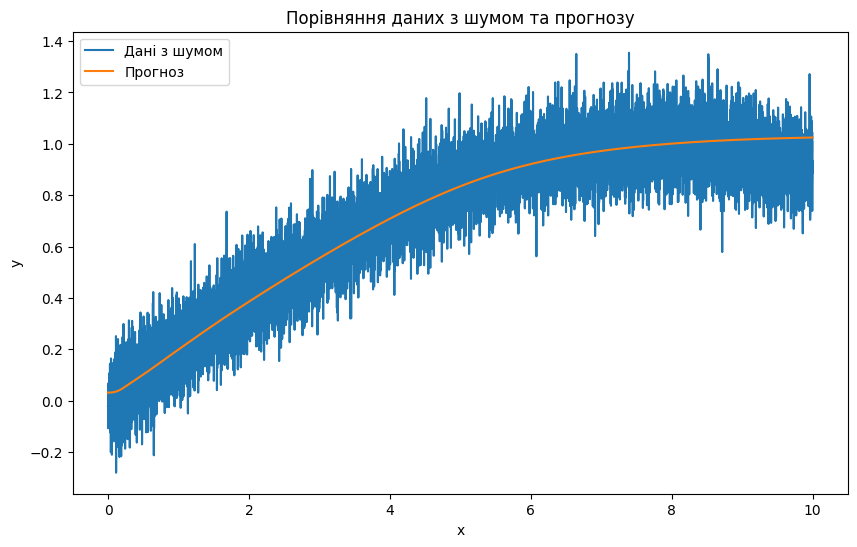

In [2]:
N = 10000
x = np.linspace(0, 10, N)
y = np.sin(x / 5) + 0.1 * np.random.randn(N)

# Побудова двонаправленої RNN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.RepeatVector(10),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
])

model.compile(optimizer='adam', loss='mse')

x_train = x.reshape(-1, 1, 1)
y_train = y.reshape(-1, 1, 1)

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

y_pred = model.predict(x_train)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Дані з шумом')
plt.plot(x, y_pred[:, 0, 0], label='Прогноз')
plt.title('Порівняння даних з шумом та прогнозу')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()